In [1]:
from comut.comut import CoMut
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df.head()

,id,wt_prediction,mut_prediction,pred_difference,vcf_id,mirna_accession,gene_id,mutation_context,sample,is_intron,...,is_cosmic_tier_1,is_driver,mirna_name,mirna_family,seed,is_gene_upregulated,is_gene_downregulated,gain,loss,Cosmic Tier 1
0,PD4005a_6_93990242_C_T_MIMAT0003233,0.437320,0.798163,0.361,PD4005a,MIMAT0003233,ENSG00000135333,T[C>T]A,SBS2,True,...,False,True,hsa-miR-551b-3p,miR-551-3p,TGAAACC,False,True,True,False,No
1,PD4005a_6_93990242_C_T_MIMAT0004694,0.284314,0.578132,0.294,PD4005a,MIMAT0004694,ENSG00000135333,T[C>T]A,SBS2,True,...,False,True,hsa-miR-342-5p,miR-342-5p/4664-5p,CAATCAC,False,True,True,False,No
2,PD4005a_6_93990242_C_T_MIMAT0016887,0.387355,0.686626,0.299,PD4005a,MIMAT0016887,ENSG00000135333,T[C>T]A,SBS2,True,...,False,True,hsa-miR-4325,miR-4325,CACTGAG,False,True,True,False,No
3,PD4005a_6_93990242_C_T_MIMAT0018189,0.197255,0.574018,0.377,PD4005a,MIMAT0018189,ENSG00000135333,T[C>T]A,SBS2,True,...,False,True,hsa-miR-3915,miR-3915,ATAAGAC,False,True,True,False,No
4,PD4005a_6_93990242_C_T_MIMAT0019711,0.676799,0.414822,-0.262,PD4005a,MIMAT0019711,ENSG00000135333,T[C>T]A,SBS2,True,...,False,True,hsa-miR-4649-5p,miR-4649-5p/6729-5p,TCTGAGA,True,False,False,True,No


In [2]:
genes.biotype.value_counts()

NameError: name 'genes' is not defined

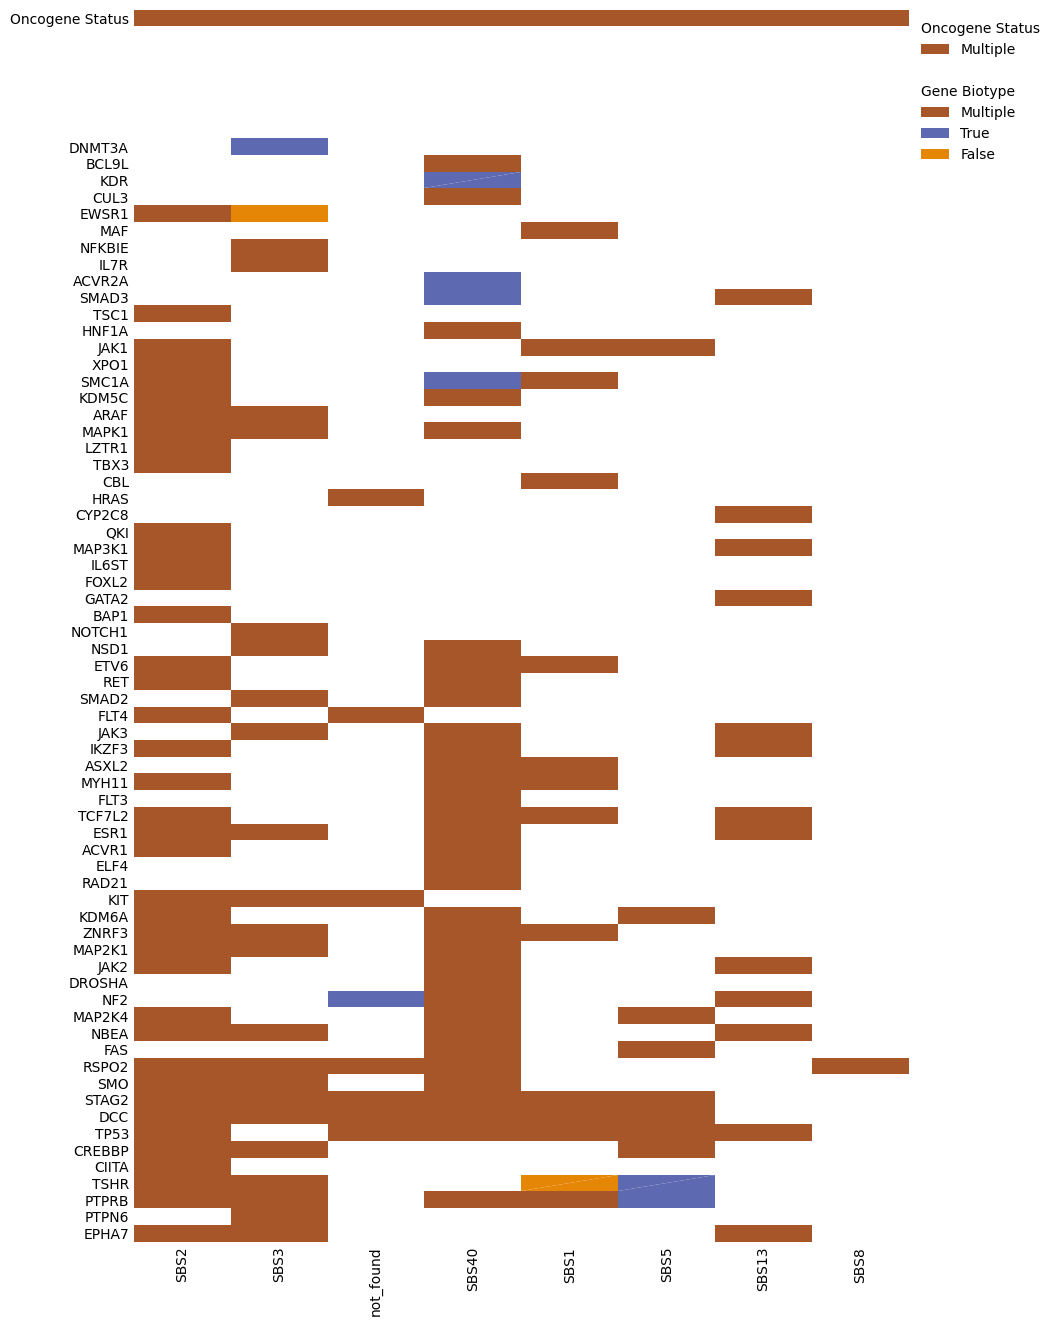

In [10]:
df = pd.read_csv("is_driver.csv")

df = df.rename(columns={
    'mutsig': 'sample', # bottom
    'gene_name': 'category', # left
    'is_intron': 'value' # legend
})

# Initialize CoMut object
example_comut = CoMut()

# Add categorical data for Gene Biotype
example_comut.add_categorical_data(data=df, name='Gene Biotype')

# Prepare the is_oncogene data
oncogene_data = df[['sample', 'is_oncogene']].copy()
oncogene_data['category'] = 'Oncogene Status'
oncogene_data['value'] = oncogene_data['is_oncogene'].apply(lambda x: 'Oncogene' if x else 'Not Oncogene')
oncogene_data = oncogene_data.drop(columns=['is_oncogene'])

# Add the is_oncogene data
example_comut.add_categorical_data(data=oncogene_data, name='Oncogene Status')

# Define structure
structure = [['Gene Biotype'], ['Oncogene Status']]

# Plot CoMut
example_comut.plot_comut(structure=structure, figsize=(10, 16))
example_comut.add_unified_legend()

# Show plot
plt.show()
